<img src='Image/CBG18.png' width="220px" align="right"> <img src='Image/uff-logo.png' width="200px" align="left"> <img src='Image/logon.jpg' width="200px" align="center"> 

## <center> Synthetic data - Dike model <center> 

--------------------------------------------------------------------------------------------------------------------

In [1]:
################ python internal packages ###############
import numpy as np
import pylab as py
import pandas as pd
from scipy.interpolate import griddata
from scipy import stats
import pandas as pd
from matplotlib import widgets
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
from IPython.display import Latex
#########################################################

In [2]:
################### import external packages #################
from modules.sphere import sphere_gz
from modules.plots import rectangle, draw_prism
from modules.iplots import model_masses
##############################################################

# <center> Step # 01: Read synthetic data and the dike model info <center>

In [3]:
# read synthetic data file using pandas package:
data = pd.read_csv('Synthetic/synthetic_data.txt', sep = ' ')
print data
# read dike file using pandas package (dike info is just for ploting issues!):
dike = pd.read_csv('Synthetic/dike_model.txt', sep = ' ')
print dike

             X(m)    Y(m)  elev(m)  gz(mgal)
0    -5000.000000 -3000.0   -100.0  0.663597
1    -4898.989899 -3000.0   -100.0  0.655392
2    -4797.979798 -3000.0   -100.0  0.687784
3    -4696.969697 -3000.0   -100.0  0.818663
4    -4595.959596 -3000.0   -100.0  0.890640
5    -4494.949495 -3000.0   -100.0  0.938336
6    -4393.939394 -3000.0   -100.0  0.950964
7    -4292.929293 -3000.0   -100.0  0.866866
8    -4191.919192 -3000.0   -100.0  0.858331
9    -4090.909091 -3000.0   -100.0  0.950428
10   -3989.898990 -3000.0   -100.0  1.022298
11   -3888.888889 -3000.0   -100.0  1.059486
12   -3787.878788 -3000.0   -100.0  1.101363
13   -3686.868687 -3000.0   -100.0  1.064230
14   -3585.858586 -3000.0   -100.0  1.099631
15   -3484.848485 -3000.0   -100.0  1.017342
16   -3383.838384 -3000.0   -100.0  1.130737
17   -3282.828283 -3000.0   -100.0  1.144270
18   -3181.818182 -3000.0   -100.0  1.267344
19   -3080.808081 -3000.0   -100.0  1.259159
20   -2979.797980 -3000.0   -100.0  1.265489
21   -2878

#  <center size=3> Some useful tools of pandas: <center>


In [4]:
data.min() # minimum values per column

X(m)       -5000.000000
Y(m)       -3000.000000
elev(m)     -100.000000
gz(mgal)       0.594732
dtype: float64

In [5]:
data.max() # maximum values per column

X(m)        5000.000000
Y(m)        3000.000000
elev(m)     -100.000000
gz(mgal)       5.413561
dtype: float64

In [6]:
data.sum() # sum values per column

X(m)        4.547474e-12
Y(m)       -4.074536e-10
elev(m)    -1.000000e+06
gz(mgal)    2.263182e+04
dtype: float64

In [7]:
data.abs() # abs values per column

,X(m),Y(m),elev(m),gz(mgal)
0,5000.000000,3000.0,100.0,0.663597
1,4898.989899,3000.0,100.0,0.655392
2,4797.979798,3000.0,100.0,0.687784
3,4696.969697,3000.0,100.0,0.818663
4,4595.959596,3000.0,100.0,0.890640
5,4494.949495,3000.0,100.0,0.938336
6,4393.939394,3000.0,100.0,0.950964
7,4292.929293,3000.0,100.0,0.866866
8,4191.919192,3000.0,100.0,0.858331
9,4090.909091,3000.0,100.0,0.950428


In [8]:
data.diff() # diference values of each line

,X(m),Y(m),elev(m),gz(mgal)
0,NaN,NaN,NaN,NaN
1,101.010101,0.0,0.0,-0.008204
2,101.010101,0.0,0.0,0.032392
3,101.010101,0.0,0.0,0.130879
4,101.010101,0.0,0.0,0.071977
5,101.010101,0.0,0.0,0.047697
6,101.010101,0.0,0.0,0.012628
7,101.010101,0.0,0.0,-0.084098
8,101.010101,0.0,0.0,-0.008535
9,101.010101,0.0,0.0,0.092097


In [9]:
data.count() # number of lines of each column

X(m)        10000
Y(m)        10000
elev(m)     10000
gz(mgal)    10000
dtype: int64

In [10]:
data.mean() # mean of each column

X(m)        4.547474e-16
Y(m)       -4.074536e-14
elev(m)    -1.000000e+02
gz(mgal)    2.263182e+00
dtype: float64

In [11]:
data.median() # median of each column

X(m)          0.000000
Y(m)          0.000000
elev(m)    -100.000000
gz(mgal)      2.004417
dtype: float64

# Interpolate your data for map visualization.  This is for a non-gridded data, which is really a common situation !

In [12]:
# set the mesh limits from real data coordinates with pandas command presented above:
xmin = data.min()[0]
print 'min x coordinate =', xmin
ymin = data.min()[1]
print 'min y coordinate =', ymin
xmax = data.max()[0]
print 'max x coordinate =', xmax
ymax = data.max()[1]
print 'max y coordinate =', ymax

# define the number of data in both x and y directions: 
nx = 100 
ny = 100 

# create a linspace for x coordinates:
x = np.linspace(xmin, xmax, nx, endpoint=True)
# and also for y coordinates:
y = np.linspace(ymin, ymax, ny, endpoint=True)
# mesh for interpolation:
X,Y = np.meshgrid(x,y)

min x coordinate = -5000.0
min y coordinate = -3000.0
max x coordinate = 5000.0
max y coordinate = 3000.0


# <center size=3>   Interpolation using scipy package : <center> 

In [13]:
# put the read data into more mnemonic variables and convert to lists to perform calculations:
coordx = data.iloc[:,0] # x coordinate (m)
coordy = data.iloc[:,1] # y coordinate (m)
elev   = data.iloc[:,2] # elevation (m) - in this case, is one elevation for the whole data-set! pay attention!
gz     = data.iloc[:,3] # vertical attraction (mGal) 

real_coords = (coordx, coordy) # real observation positions
grid_coords = (X,Y) # interpolated observation positions

# function of scipy for interpolation:
gzi = griddata(real_coords, gz, grid_coords , method='cubic') # from now on, this will be our "real data"

# <center size=3>   Visualization of the interpolated data and the contour of the dike : <center> 

In [14]:
# contour of the dike using pandas commands:
xmin_dike = dike.iloc[0,0]
xmax_dike = dike.iloc[0,1]
ymin_dike = dike.iloc[0,2]
ymax_dike = dike.iloc[0,3]
zmin_dike = dike.iloc[0,4]
zmax_dike = dike.iloc[0,5]

# create a list with the contour of the dike (IN THIS CASE, THE REAL SOURCE!)
dike2D = [xmin_dike, xmax_dike, ymin_dike, ymax_dike]

# coordinates of the dike for 3D plot:
dike3D = [xmin_dike, xmax_dike, ymin_dike, ymax_dike, zmin_dike, zmax_dike]

print 'Horizontal limits of the dike = ', dike2D
print 'Coordinates of the dike = ', dike3D

Horizontal limits of the dike =  [-500.0, 500.0, -500.0, 500.0]
Coordinates of the dike =  [-500.0, 500.0, -500.0, 500.0, 2000.0, 5000.0]


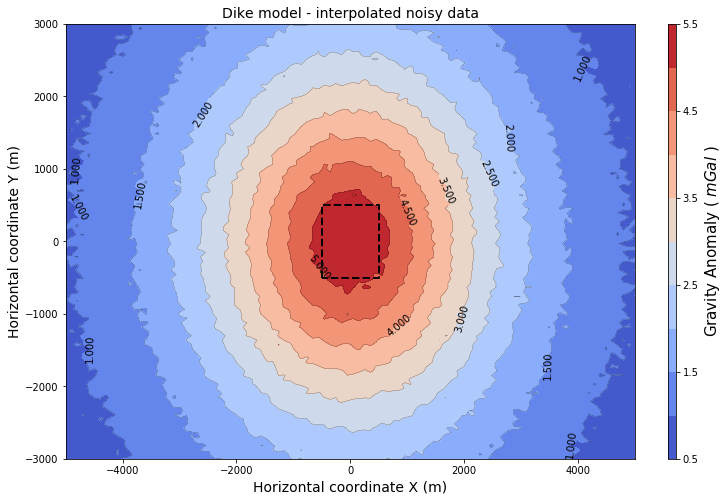

In [24]:
# Ploting the data to see if it's ok so far:
plt.close('all')
fig = plt.figure(figsize=(12,8))
ax1 = fig.subplots(1, 1)
fs = 14 # fontsize used in the labels

# draw the edges of the dike for better vizualization:
rectangle(ax1, dike2D, style='--k', linewidth=2, fill=None, alpha=1., label=None)

# plot the data in countor map:
plt.title('Dike model - interpolated noisy data', fontsize = fs)
p = ax1.contour(X, Y, gzi, 10, colors='k', linewidths = 0.2, vmin=np.min(gzi), vmax=np.max(gzi) )

# display the lines and the respective value of each line:
ax1.clabel(p, inline=10, fontsize=10) #(only work for contour command!!!!!!)

p = ax1.contourf(X, Y, gzi, 10, cmap = plt.cm.coolwarm, vmin = np.min(gz), vmax = np.max(gz))

# Colorbar specifications:
cbar = fig.colorbar(p, aspect=60, fraction = 0.1, orientation="vertical")
cbar.set_label('Gravity Anomaly ( $ mGal$ )',fontsize=15, rotation = 90)
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)
plt.show()

## Test #01: Place a single point mass at the very bottom of the interpretive model:

In [ ]:
# ---------- set the properties of the point mass ------------:
xc = 0.0 # meters
yc = 0.0 # meters
zc = 39000.0 # meters
rho = 2000.0 # kg/m3

# ---- save in a list to perform calculation of the gravity anomaly----:
source = ( xc, yc, zc, rho ) 
# predicted vertical attraction gz:
gz_pred = sphere_gz(X,Y,elev[0],source) 

## Plot data produced by the deep point mass and compare with the real data:

TypeError: rectangle() takes at least 2 arguments (6 given)

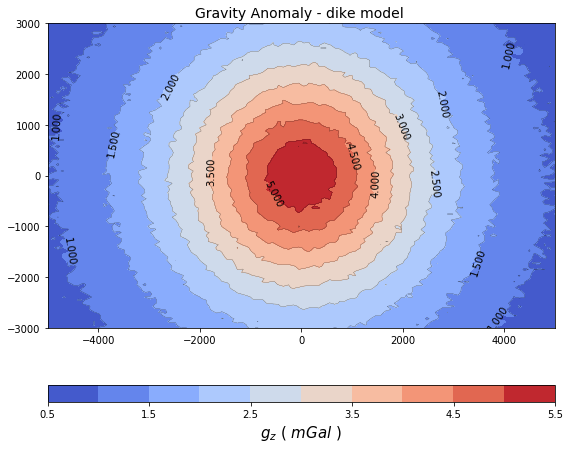

In [26]:
# -------------------- Ploting all results obtained so far --------------------:
plt.close('all')
fig = plt.figure(figsize=(20,7))
ax1 = fig.subplots(1, 1)
fs = 14 # fontsize used in the labels
#-------------------- Plot the data produced by the dike model: --------------------
plt.subplot(1, 2, 1)
plt.title('Gravity Anomaly - dike model ', fontsize = fs)

# plot isolines:
p = plt.contour(X, Y, gzi, 10, colors='k', linewidths = 0.2, vmin=np.min(gzi), vmax=np.max(gzi) )

# display the lines and the respective value of each line:
plt.clabel(p, inline=1, fontsize=10) #(only work for contour command!!!!!!)

p1 = plt.contourf(X, Y, gzi, 10, cmap = plt.cm.coolwarm, vmin = np.min(gzi), vmax = np.max(gzi))
cbar1 = plt.colorbar(p1, aspect=30, fraction = 0.05, orientation="horizontal")
cbar1.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 0)

# -------- plot the dike contour jointly with the color map ---------------------:
rectangle(ax1,dike2D, style='--k', linewidth=2, fill= None, alpha=1., label=None)

plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

###########################################################################################################################
#-------------------- Plot the data produced by the deep point mass : --------------------
plt.subplot(1, 2, 2)
plt.title('Gravity Anomaly - point mass model ', fontsize = fs)

# plot isolines:
p = plt.contour(X, Y, gz_pred, 10, colors='k', linewidths = 0.2, vmin=np.min(gzi), vmax=np.max(gzi) )

# display the lines and the respective value of each line:
plt.clabel(p, inline=1, fontsize=10) #(only work for contour command!!!!!!)

# for the color map as a function of the data produced by the deep point mass:
p2 = plt.contourf(X, Y, gz_pred, 10, cmap = plt.cm.coolwarm, vmin = np.min(gzi), vmax = np.max(gzi))

#-------------------- Color bar specifications: --------------------
cbar2 = plt.colorbar(p1, aspect=30, fraction = 0.05, orientation="horizontal")
cbar2.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 0)

# -------- plot the dike contour into the contor map ---------------------:
rectangle(ax1, dike2D, style='--k', linewidth=2, fill= None, alpha=1., label=None)

# -------- plot the point mass into the contor map ---------------------:
plt.scatter(xc, yc, s=rho, c='k', marker='.')

plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

plt.show()
# save figure tests:
fig.savefig('Synthetic/test#01-deep_mass_2D.pdf', dpi=300, transparent=True, bbox_inches='tight')

#  <center> 3D Plot of model and data in slice <center>

In [ ]:
# ------- compute the difference between the "observed" data and the predicted data -------:
residuals = gzi - gz_pred

In [ ]:
%matplotlib tk
py.rcParams['contour.negative_linestyle'] = 'dashed'
plt.close('all')
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d') # 3D boxplot where the figure goes

# plot the dike and store it in pbox plotting object:
pbox = draw_prism(ax, dike3D)

# --- change size projection ---
x_scale=1.
y_scale=1.
z_scale=1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
pbox.get_proj=short_proj

# ----- define labels and limits of the plotbox:
pbox.set_xlabel('Horizontal coordinate x (m)', labelpad=20 ,fontsize=fs)
pbox.set_ylabel('Horizontal coordinate y (m)', labelpad=20 ,fontsize=fs)
pbox.set_xlim( min(x), max(x) )
pbox.set_ylim( min(y), max(y) )
pbox.set_zlim(-500, 40000)
pbox.set_zlabel('Depth (m)',labelpad=20 ,fontsize=fs, rotation = 90)
pbox.view_init(35, 40)

# put z downward
pbox.invert_zaxis()

# add the deep point mass here:
pbox.scatter3D(xc, yc, zc, s= rho, c='k',marker = '.')

# ------------------- vertical gravitational atraction produced by the dike ------------------:
p1 = pbox.contour(X, Y, residuals, 10, zdir='z', 
                offset=np.min(elev) , cmap='coolwarm', vmin = np.min(residuals), vmax = np.max(residuals) )
cbar1 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
cbar1.set_label('Residuals ( $ mGal $ )',fontsize=fs, rotation = 90)

# ------------------- vertical gravitational atraction produced by the deep point mass--------:
#p2 = pbox.contour(X, Y, gz_pred, 10, zdir='z', cmap='coolwarm', offset=40000.0, vmin=np.min(gzi), vmax=np.max(gzi) )

# ------------- Color bar specifications ---------------------------:
#cbar2 = fig.colorbar(p2, aspect = 50, fraction = 0.01, orientation="horizontal")
#cbar2.set_label('Gravity Anomaly ( $ mGal $ )',fontsize=fs, rotation = 0)
#cbar2.add_lines(p2)

pbox.clabel(p1, inline=1, fontsize=6)
plt.tight_layout(True)
plt.show()
# save figure tests:
fig.savefig('Synthetic/test#01-deep_mass_3D.pdf', dpi=300, transparent=True, bbox_inches='tight')

# Conclusão: Este é o conceito de espaço nulo, que consiste em um conjunto específico de parâmetros do modelo utilizado (massas pontuais) que não produz qualquer alteração nos dados calculados. Isso significa que alguns dos parâmetros utilizados (zc muito profundo) para o teste não produzem qualquer alteração na anomalia medida. 


## Test #02: Physical property tests - calibration of the density ranges:

### Test #02 : Point mass with super high density:

In [ ]:
# ---------- set the properties of the point mass ------------:
xc = 0.0
yc = 0.0
zc = 3000.0
rho = 20000.0
source = ( xc, yc, zc, rho ) 
# predicted vertical attraction gz:
gz_pred = sphere_gz(X,Y,elev[0],source) 
print gz_pred.shape

In [ ]:
# ------- compute gravity data for all clicked point masses:
# Calculating the gravity attraction for all point masses:
gz = 0.0
# range of all masses:
source = [ xc, yc, zc, rho ] 
#print source
gz_pred = sphere_gz(X, Y, elev[0], source) # sum the effect of all masses 

## <Center> Plot 2D contour map to check for the data-misfit. <center>

In [ ]:
# -------------------- Ploting all results obtained so far --------------------:
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(20,7))
fs = 14
#-------------------- Plot the data produced by the dike model: --------------------
plt.subplot(1, 2, 1)
plt.title('$z$ component of gravity - dike model ', fontsize = fs)

# plot isolines:
p = plt.contour(X, Y, gzi, 10, colors='k', linewidths = 0.5, vmin=np.min(gzi), vmax=np.max(gzi) )

# display the lines and the respective value of each line:
plt.clabel(p, inline=1, fontsize=10) #(only work for contour command!!!!!!)

p1 = plt.contourf(X, Y, gzi, 10, cmap = plt.cm.coolwarm, vmin = np.min(gzi), vmax = np.max(gzi))
cbar1 = plt.colorbar(p1, aspect=30, fraction = 0.05, orientation="horizontal")
cbar1.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 0)

# -------- plot the dike contour jointly with the color map ---------------------:
rectangle(dike2D, style='--k', linewidth=2, fill= None, alpha=1., label=None)
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

###########################################################################################################################
#-------------------- Plot the data produced by the deep point mass : --------------------
plt.subplot(1, 2, 2)
plt.title('$z$ component of gravity - point masses model ', fontsize = fs)

# plot isolines:
p = plt.contour(X, Y, gz_pred, 10, colors='k', linewidths = 0.5, vmin=np.min(gzi), vmax=np.max(gzi) )

# display the lines and the respective value of each line:
plt.clabel(p, inline=1, fontsize=10) #(only work for contour command!!!!!!)

# for the color map as a function of the data produced by the deep point mass:
p2 = plt.contourf(X, Y, gz_pred, 10, cmap = plt.cm.coolwarm, vmin = np.min(gzi), vmax = np.max(gzi))

#-------------------- Color bar specifications: --------------------
cbar2 = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar2.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 0)

# -------- plot the dike contour into the contor map ---------------------:
rectangle(dike2D, style='--k', linewidth=2, fill= None, alpha=1., label=None)

# -------- plot the point mass into the contor map ---------------------:
plt.scatter(xc, yc, s=rho, c='k', marker='.')

plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

#plt.savefig('figures/prism-gravity')

plt.show()
# save figure tests:
fig.savefig('Synthetic/test#02-High_Density_Mass_2D.pdf', dpi=300, transparent=True, bbox_inches='tight')

#  <center> 3D Plot of model and data in slice <center>

In [ ]:
# ------- compute the difference between the "observed" data and the predicted data -------:
residuals = gzi-gz_pred

In [ ]:
%matplotlib tk
py.rcParams['contour.negative_linestyle'] = 'dashed'
plt.close('all')
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d') # 3D boxplot where the figure goes

# plot the dike and store it in pbox plotting object:
pbox = draw_prism(ax, dike3D)

# --- change size projection ---
x_scale=1.
y_scale=1.
z_scale=1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
pbox.get_proj=short_proj

# ----- define labels and limits of the plotbox:
pbox.set_xlabel('Horizontal coordinate x (m)', labelpad=20 ,fontsize=fs)
pbox.set_ylabel('Horizontal coordinate y (m)', labelpad=20 ,fontsize=fs)
pbox.set_xlim( min(x), max(x) )
pbox.set_ylim( min(y), max(y) )
pbox.set_zlim(-500,10000)
pbox.set_zlabel('Depth (m)',labelpad=20 ,fontsize=fs, rotation = 90)
pbox.view_init(15, 55)

# put z downward
pbox.invert_zaxis()

# ------------------- vertical gravitational atraction produced by the dike ------------------:
p1 = pbox.contour(X, Y, residuals, 10, zdir='z', 
                offset=np.min(elev), cmap='coolwarm', vmin = np.min(residuals), vmax = np.max(residuals) )
cbar1 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
cbar1.set_label('Residuals ( $ mGal $ )',fontsize=16, rotation = 90)

###########################################################################################################################
# ------------------- vertical gravitational atraction produced by the point mass--------:
#p2 = pbox.contour(X, Y, gz_pred, 10, zdir='z', offset=np.min(elev) , colors='k', linewidths = 0.5, 
#                  vmin=np.min(gzi), vmax=np.max(gzi) )

# add the deep point mass here:
pbox.scatter3D(xc, yc, zc, s=rho , c='k', marker = '.')

# ------------- Color bar specifications ---------------------------:
#cbar2 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
#cbar2.set_label('Gravity Anomaly ( $ mGal $ )',fontsize=fs, rotation = 90)
#cbar2.add_lines(p2)

#plt.clabel(p2, inline=1, fontsize=8)
plt.tight_layout(True)
plt.show()
# save figure tests:
fig.savefig('Synthetic/test#02-High_Density_Mass_3D.pdf', dpi=300, transparent=True, bbox_inches='tight')

### Test #03 : Point mass with super low density:

In [ ]:
# ---------- set the properties of the point mass ------------:
xc = 0.0
yc = 0.0
zc = 3000.0
rho = 500.0
source = ( xc, yc, zc, rho ) 
# predicted vertical attraction gz:
gz_pred = sphere_gz(X,Y,elev[0],source) 
print gz_pred.shape

In [ ]:
# ------- compute gravity data for all clicked point masses:
# Calculating the gravity attraction for all point masses:
gz = 0.0
# range of all masses:
source = [ xc, yc, zc, rho ] 
#print source
gz_pred = sphere_gz(X, Y, elev[0], source) # sum the effect of all masses 

## <Center> Plot 2D contour map to check for the data-misfit. <center>

In [ ]:
# -------------------- Ploting all results obtained so far --------------------:
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(20,7))
fs = 14
#-------------------- Plot the data produced by the dike model: --------------------
plt.subplot(1, 2, 1)
plt.title('$z$ component of gravity - dike model ', fontsize = fs)

# plot isolines:
p = plt.contour(X, Y, gzi, 10, colors='k', linewidths = 0.5, vmin=np.min(gzi), vmax=np.max(gzi) )

# display the lines and the respective value of each line:
plt.clabel(p, inline=1, fontsize=10) #(only work for contour command!!!!!!)

p1 = plt.contourf(X, Y, gzi, 10, cmap = plt.cm.coolwarm, vmin = np.min(gzi), vmax = np.max(gzi))
cbar1 = plt.colorbar(p1, aspect=30, fraction = 0.05, orientation="horizontal")
cbar1.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 0)

# -------- plot the dike contour jointly with the color map ---------------------:
rectangle(dike2D, style='--k', linewidth=2, fill= None, alpha=1., label=None)
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

###########################################################################################################################
#-------------------- Plot the data produced by the deep point mass : --------------------
plt.subplot(1, 2, 2)
plt.title('$z$ component of gravity - point masses model ', fontsize = fs)

# plot isolines:
p = plt.contour(X, Y, gz_pred, 10, colors='k', linewidths = 0.5, vmin=np.min(gzi), vmax=np.max(gzi) )

# display the lines and the respective value of each line:
plt.clabel(p, inline=1, fontsize=10) #(only work for contour command!!!!!!)

# for the color map as a function of the data produced by the deep point mass:
p2 = plt.contourf(X, Y, gz_pred, 10, cmap = plt.cm.coolwarm, vmin = np.min(gzi), vmax = np.max(gzi))

#-------------------- Color bar specifications: --------------------
cbar2 = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar2.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 0)

# -------- plot the dike contour into the contor map ---------------------:
rectangle(dike2D, style='--k', linewidth=2, fill= None, alpha=1., label=None)

# -------- plot the point mass into the contor map ---------------------:
plt.scatter(xc, yc, s=rho, c='k', marker='.')

plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

#plt.savefig('figures/prism-gravity')

plt.show()
# save figure tests:
fig.savefig('Synthetic/test#03-Low_Density_Mass_2D.pdf', dpi=300, transparent=True, bbox_inches='tight')

#  <center> 3D Plot of model and data-misfit in slice <center>

In [ ]:
# ------- compute the difference between the "observed" data and the predicted data -------:
residuals = gzi - gz_pred

In [ ]:
%matplotlib tk
py.rcParams['contour.negative_linestyle'] = 'dashed'
plt.close('all')
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d') # 3D boxplot where the figure goes

# plot the dike and store it in pbox plotting object:
pbox = draw_prism(ax, dike3D)

# --- change size projection ---
x_scale=1.
y_scale=1.
z_scale=1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
pbox.get_proj=short_proj

# ----- define labels and limits of the plotbox:
pbox.set_xlabel('Horizontal coordinate x (m)', labelpad=20 ,fontsize=fs)
pbox.set_ylabel('Horizontal coordinate y (m)', labelpad=20 ,fontsize=fs)
pbox.set_xlim( min(x), max(x) )
pbox.set_ylim( min(y), max(y) )
pbox.set_zlim(-500,10000)
pbox.set_zlabel('Depth (m)',labelpad=20 ,fontsize=fs, rotation = 90)
pbox.view_init(15, 55)

# put z downward
pbox.invert_zaxis()

# ------------------- vertical gravitational atraction produced by the dike ------------------:
p1 = pbox.contourf(X, Y, residuals, 10, zdir='z', 
                offset=np.min(elev), cmap='coolwarm', vmin = np.min(residuals), vmax = np.max(residuals) )
cbar1 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
cbar1.set_label('Residuals ( $ mGal $ )',fontsize=16, rotation = 90)

###########################################################################################################################
# ------------------- vertical gravitational atraction produced by the point mass--------:
#p2 = pbox.contour(X, Y, gz_pred, 10, zdir='z', offset=np.min(elev) , colors='k', linewidths = 0.5, 
#                  vmin=np.min(gzi), vmax=np.max(gzi) )

# add the deep point mass here:
pbox.scatter3D(xc, yc, zc, s=rho , c='k', marker = '.')

# ------------- Color bar specifications ---------------------------:
#cbar2 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
#cbar2.set_label('Gravity Anomaly ( $ mGal $ )',fontsize=fs, rotation = 90)
#cbar2.add_lines(p2)

plt.clabel(p2, inline=1, fontsize=8)
plt.tight_layout(True)
plt.show()
# save figure tests:
fig.savefig('Synthetic/test#03-Low_Density_Mass_3D.pdf', dpi=300, transparent=True, bbox_inches='tight')

## Test #04: Using the click method for modeling with many point masses 

In [ ]:
#--------- define the plotting area for both (x,y) and (depth, density)---------:
area_xy = [min(x) , max(x), min(y), max(y)]

# based on the knowledge about the rock densities and common depth investigations!
area_rhoz = [2999.0, 3000.0, np.min(elev), 7000.0]

print 'area_xy=', area_xy
print 'area_rhoz', area_rhoz

In [ ]:
# call function for picking x,y,z,rho values from the plot areas:
%matplotlib tk
xc,yc,zc,rho = model_masses(area_xy, area_rhoz)

In [ ]:
print 'These numbers should be the same =', len(xc), len(yc), len(zc), len(rho)
nmasses = len(xc)
print nmasses

# change the depth off all points at once:
#zc = np.array(zc) + 500.0 
rho = np.array(rho) -200.0

In [ ]:
# ------- compute gravity data for all clicked point masses:
# Calculating the gravity attraction for all point masses:
gz_pred = 0.0
# range of all masses:
for i in range( len(xc) ):
    source=[]
    source = [ xc[i], yc[i], zc[i], rho[i]/nmasses ]  # calling one source a time:
    print source
    gz_pred += sphere_gz(X, Y, elev[0], source) # sum the effect of all masses 

## <Center> Plot 2D contour map to check for the data-fit. <center>

In [ ]:
# -------------------- Ploting all results obtained so far --------------------:
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(20,7))
fs = 14
#-------------------- Plot the data produced by the dike model: --------------------
plt.subplot(1, 2, 1)
plt.title('Gravity Anomaly - dike model ', fontsize = fs)

# plot isolines:
p = plt.contour(X, Y, gzi, 10, colors='k', linewidths = 0.5, vmin=np.min(gzi), vmax=np.max(gzi) )

# display the lines and the respective value of each line:
plt.clabel(p, inline=1, fontsize=10) #(only work for contour command!!!!!!)

p1 = plt.contourf(X, Y, gzi, 10, cmap = plt.cm.coolwarm, vmin = np.min(gzi), vmax = np.max(gzi))
cbar1 = plt.colorbar(p1, aspect=30, fraction = 0.05, orientation="horizontal")
cbar1.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 0)

# -------- plot the dike contour jointly with the color map ---------------------:
rectangle(dike2D, style='--k', linewidth=2, fill= None, alpha=1., label=None)
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

###########################################################################################################################
#-------------------- Plot the data produced by the deep point mass : --------------------
plt.subplot(1, 2, 2)
plt.title('Gravity Anomaly - point masses model ', fontsize = fs)

# plot isolines:
p = plt.contour(X, Y, gz_pred, 10, colors='k', linewidths = 0.5, vmin=np.min(gzi), vmax=np.max(gzi) )

# display the lines and the respective value of each line:
plt.clabel(p, inline=1, fontsize=10) #(only work for contour command!!!!!!)

# for the color map as a function of the data produced by the deep point mass:
p2 = plt.contourf(X, Y, gz_pred, 10, cmap = plt.cm.coolwarm, vmin = np.min(gzi), vmax = np.max(gzi))

#-------------------- Color bar specifications: --------------------
cbar2 = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar2.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 0)

# -------- plot the dike contour into the contor map ---------------------:
rectangle(dike2D, style='--k', linewidth=2, fill= None, alpha=1., label=None)

# -------- plot the point mass into the contor map ---------------------:
plt.scatter(xc, yc, s=rho, c='k', marker='.')

plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

#plt.savefig('figures/prism-gravity')

plt.show()
# save figure tests:
fig.savefig('Synthetic/test#04-multiple_masses_2D.pdf', dpi=300, transparent=True, bbox_inches='tight')

#  <center> 3D Plot of model and data-misfit in slice <center>

In [ ]:
# ------- compute the difference between the "observed" data and the predicted data -------:
residuals = gzi - gz_pred

In [ ]:
%matplotlib tk
py.rcParams['contour.negative_linestyle'] = 'dashed'
plt.close('all')
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d') # 3D boxplot where the figure goes

# plot the dike and store it in pbox plotting object:
pbox = draw_prism(ax, dike3D)

# --- change size projection ---
x_scale=1.
y_scale=1.
z_scale=1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
pbox.get_proj=short_proj

# ----- define labels and limits of the plotbox:
pbox.set_xlabel('Horizontal coordinate x (m)', labelpad=20 ,fontsize=fs)
pbox.set_ylabel('Horizontal coordinate y (m)', labelpad=20 ,fontsize=fs)
pbox.set_xlim( min(x), max(x) )
pbox.set_ylim( min(y), max(y) )
pbox.set_zlim(-500,10000)
pbox.set_zlabel('Depth (m)',labelpad=20 ,fontsize=fs, rotation = 90)
pbox.view_init(30, 55)

# put z downward
pbox.invert_zaxis()

# ------------------- vertical gravitational atraction produced by the dike ------------------:
p1 = pbox.contour(X, Y, residuals, 10, zdir='z', 
                offset=np.min(elev), cmap='coolwarm', vmin = np.min(residuals), vmax = np.max(residuals) )
cbar1 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
cbar1.set_label('Residuals ( $ mGal $ )',fontsize=16, rotation = 90)

# add the deep point mass here:
pbox.scatter3D(xc, yc, zc, s=rho , c='k', marker = '.')

plt.tight_layout(True)
plt.show()
# save figure tests:
fig.savefig('Synthetic/test#04-multiple_masses_3D.pdf', dpi=300, transparent=True, bbox_inches='tight')